# Solving SIR Models
#### Lehner White

In [2]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scikits import bvp_solver

#### Problem 1

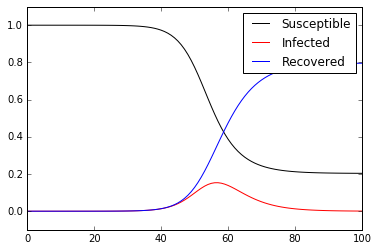

In [3]:
y_p  = lambda y,x : np.array([-1./2. * y[1] * y[0], 1./2. * y[1] * y[0] - 1./4. * y[1], 1./4. * y[1]])
y0 = np.array([(1 - 6.25e-7), 6.25e-7, 0])
x = np.linspace(0,100,101)
Y = odeint(y_p, y0, x)

S = Y[:,0]
I = Y[:,1]
R = Y[:,2]

plt.plot(x, S, 'k')
plt.plot(x, I, 'r')
plt.plot(x, R, 'b')
plt.ylim(-0.1, 1.1)
plt.legend(['Susceptible','Infected','Recovered'])
plt.show()

#### Problem 2

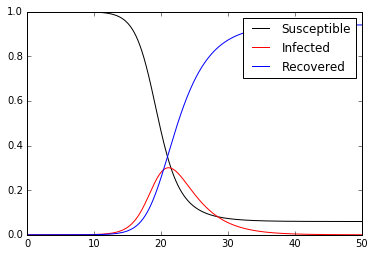

When the average days spent infected is 3 ,at the peak of infection there are 0 people that can work.
When the average days spent infected is 7 ,at the peak of infection there are 0 people that can work.


In [4]:
for ads in (3., 7.):
    pop = 3000000.
    cpd = 1.
    I0 = 5.
    beta = cpd / pop
    gamma = 1. / ads

    y_p  = lambda y,x : np.array([-1* beta * y[1] * y[0], beta * y[1] * y[0] - gamma * y[1], gamma * y[1]])
    y0 = np.array([pop, I0, 0])
    x = np.linspace(0,50,1000)
    Y = odeint(y_p, y0, x)/pop

    S = Y[:,0]
    I = Y[:,1]
    R = Y[:,2]

    if ads == 3.:
        plt.plot(x, S, 'k')
        plt.plot(x, I, 'r')
        plt.plot(x, R, 'b')
        plt.legend(['Susceptible','Infected','Recovered'])
        plt.show()

    max_sick = np.max(I)
    t = np.argmax(I)
    can_work = S[t] + R[t]
    print("When the average days spent infected is {} ,at the peak of infection there are {} people that can work.".format(str(int(ads)), str(int(can_work))))


#### Problem 3

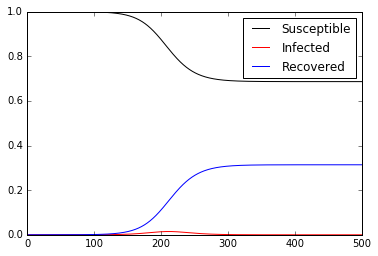

In [5]:
pop = 3000000.
cpd = 3./10.
ads = 4.
I0 = 5.
beta = cpd / pop
gamma = 1. / ads

y_p  = lambda y,x : np.array([-1* beta * y[1] * y[0], beta * y[1] * y[0] - gamma * y[1], gamma * y[1]])
y0 = np.array([pop, I0, 0])
x = np.linspace(0,500,1000)
Y = odeint(y_p, y0, x)/pop

S = Y[:,0]
I = Y[:,1]
R = Y[:,2]

plt.plot(x, S, 'k')
plt.plot(x, I, 'r')
plt.plot(x, R, 'b')
plt.legend(['Susceptible','Infected','Recovered'])
plt.show()


#### Problem 4

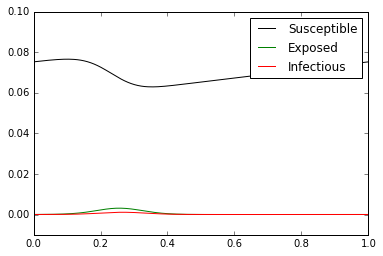

In [6]:
beta = lambda t: b0 * (1 + b1 * np.cos(2*np.pi*t))

b0 = 1575
b1 = 1
eta = 0.01
lambd = 0.0279
mu = 0.02

ode = lambda x, y : np.array([mu - beta(x) * y[0] * y[2], 
                                beta(x) * y[0] * y[2] - y[1] / lambd,
                                y[1] / lambd - y[2] / eta, 0 , 0, 0])

bcs = lambda ya, yb : (np.array(ya[:3] - ya[3:]), np.array(yb[:3] - yb[3:]))

bvp = bvp_solver.ProblemDefinition(num_ODE=6, num_parameters=0, num_left_boundary_conditions=3, boundary_points=(0,1), function=ode, boundary_conditions=bcs)
solve = bvp_solver.solve(bvp, solution_guess=(.8,.1,.1,.8,.1,.1))

x = np.linspace(0, 1, 200)
Y = solve(x)

S = Y[0,:]
E = Y[1,:]
I = Y[2,:]

plt.plot(x, S, 'k')
plt.plot(x, E, 'g')
plt.plot(x, I, 'r')
plt.legend(['Susceptible','Exposed','Infectious'])
plt.ylim([-0.01,0.1])
plt.show()
